<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

plt.style.use('fivethirtyeight')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [16]:
# create empty list for the data to be transferred into.
rows = []
# open files in a way that allows it to be converted into its rows
with open('./sat_scores.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

#separate out the categories so that they can become the keys (header) and the data        
header = rows[0]
data = rows[1:]

#Now prepare the dictionary
sat_data = {}

#A for loop to make the header list become the keys for each appropriate data list.
for index, column_name in enumerate(header):
    sat_data[column_name] = []
    for row in data:
        sat_data[column_name].append(row[index])

In [17]:
sat_data

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

## First I've taken the available data and tranferred it into a Dictionary so as to better manipulate the data using Python coding.

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

## Here I have taken that Dictionary and converted it into a Pandas DataFrame, allowing me more opportunities and capabilities to explore what this data contains with ease.

In [18]:
satsdf = pd.DataFrame(sat_data)
satsdf

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


# This is another way of achieving the same result, but without first having to turn the data into a Dictionary. Direct using Pandas.

In [19]:
sats = pd.read_csv('./sat_scores.csv', index_col = 0)
sats

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516
RI,71,501,499
PA,71,500,499
VT,69,511,506
ME,69,506,500


In [20]:
satsdf.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [21]:
sats.dtypes

Rate      int64
Verbal    int64
Math      int64
dtype: object

# Comparing these two ways of creating a DataFrame, we can see that not only was the second way faster and easier, it has also recognised all the number values as integers and stored them as such. Whereas the first way has them stored as strings still. Thus they would still need to be converted before proper analysis could be done on them.

It can be seen that by transferring it directly into a dataframe using Pandas has converted the numerical values into int values,
whereas manual transfer over has left them as string values, hence they show as objects.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [22]:
sats.head(10)

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516
RI,71,501,499
PA,71,500,499
VT,69,511,506
ME,69,506,500


The data describes the various scores achieved in three different categories: Rate, Verbal and Math, for each State.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [23]:
sats.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [24]:
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

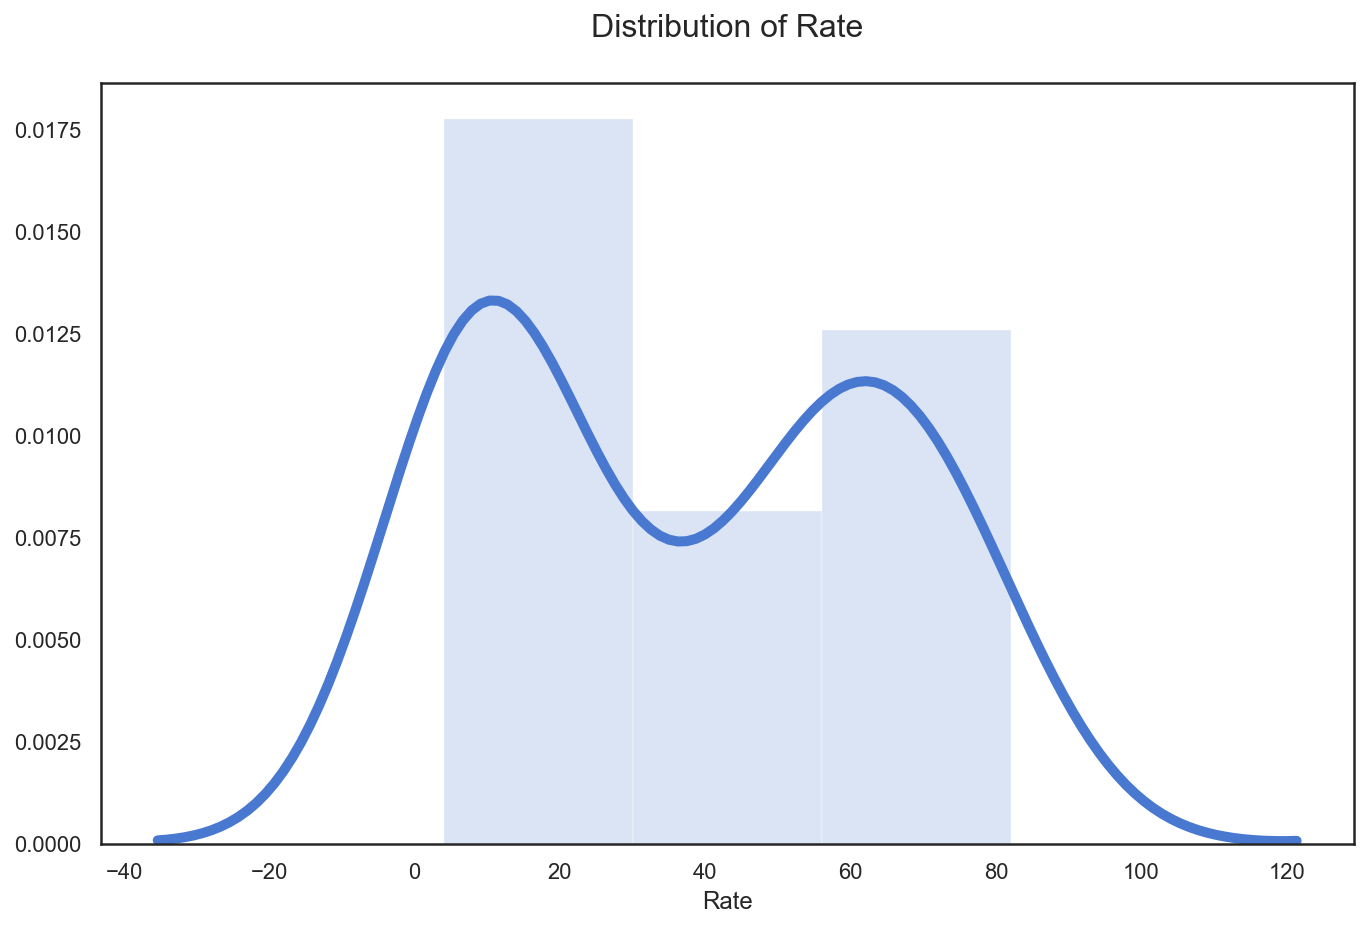

In [25]:
distribution_plotter('Rate',sats)

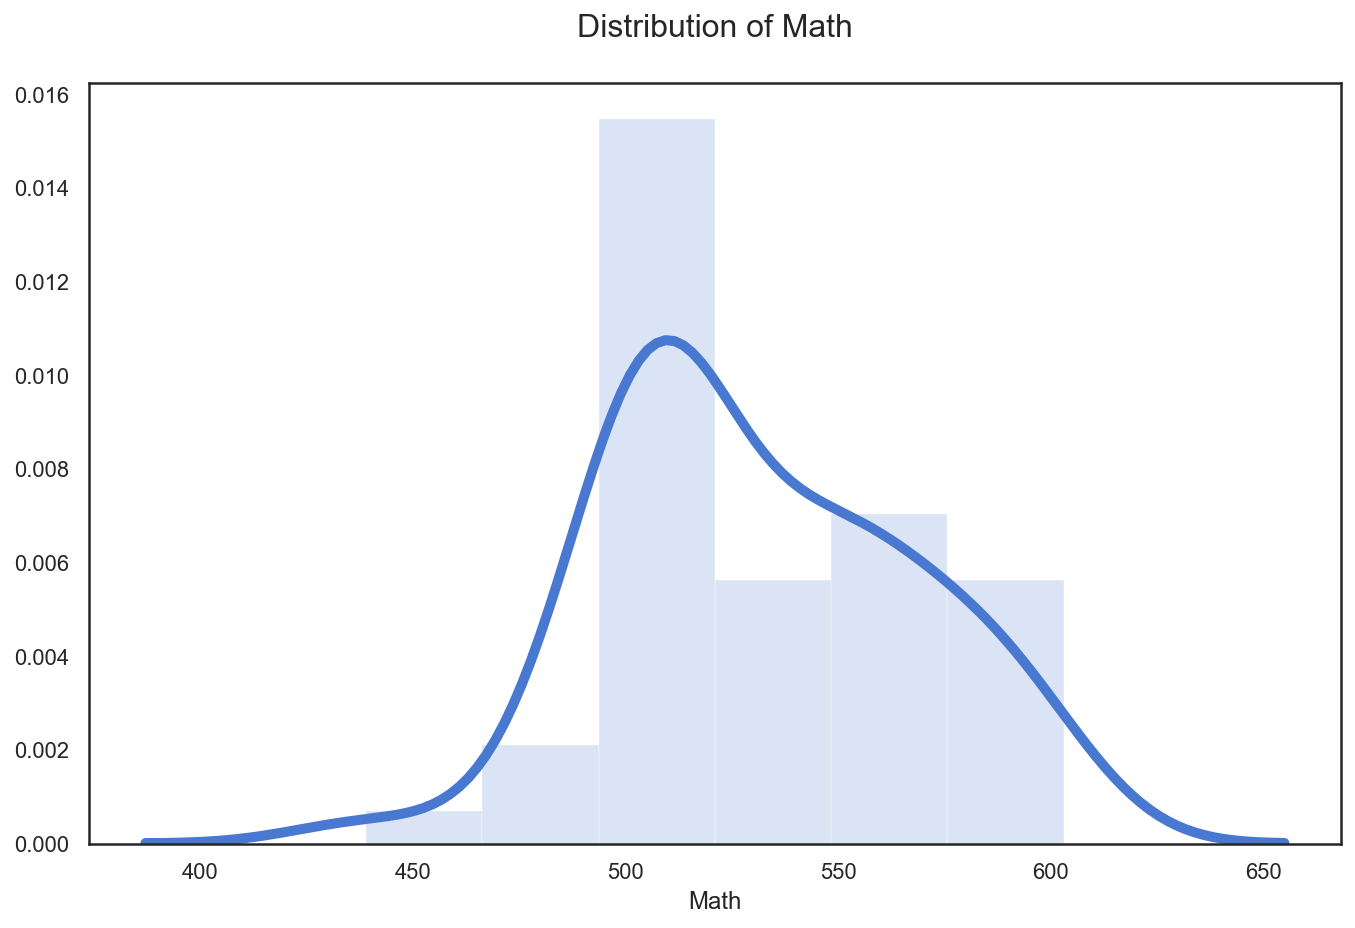

In [26]:
distribution_plotter('Math',sats)

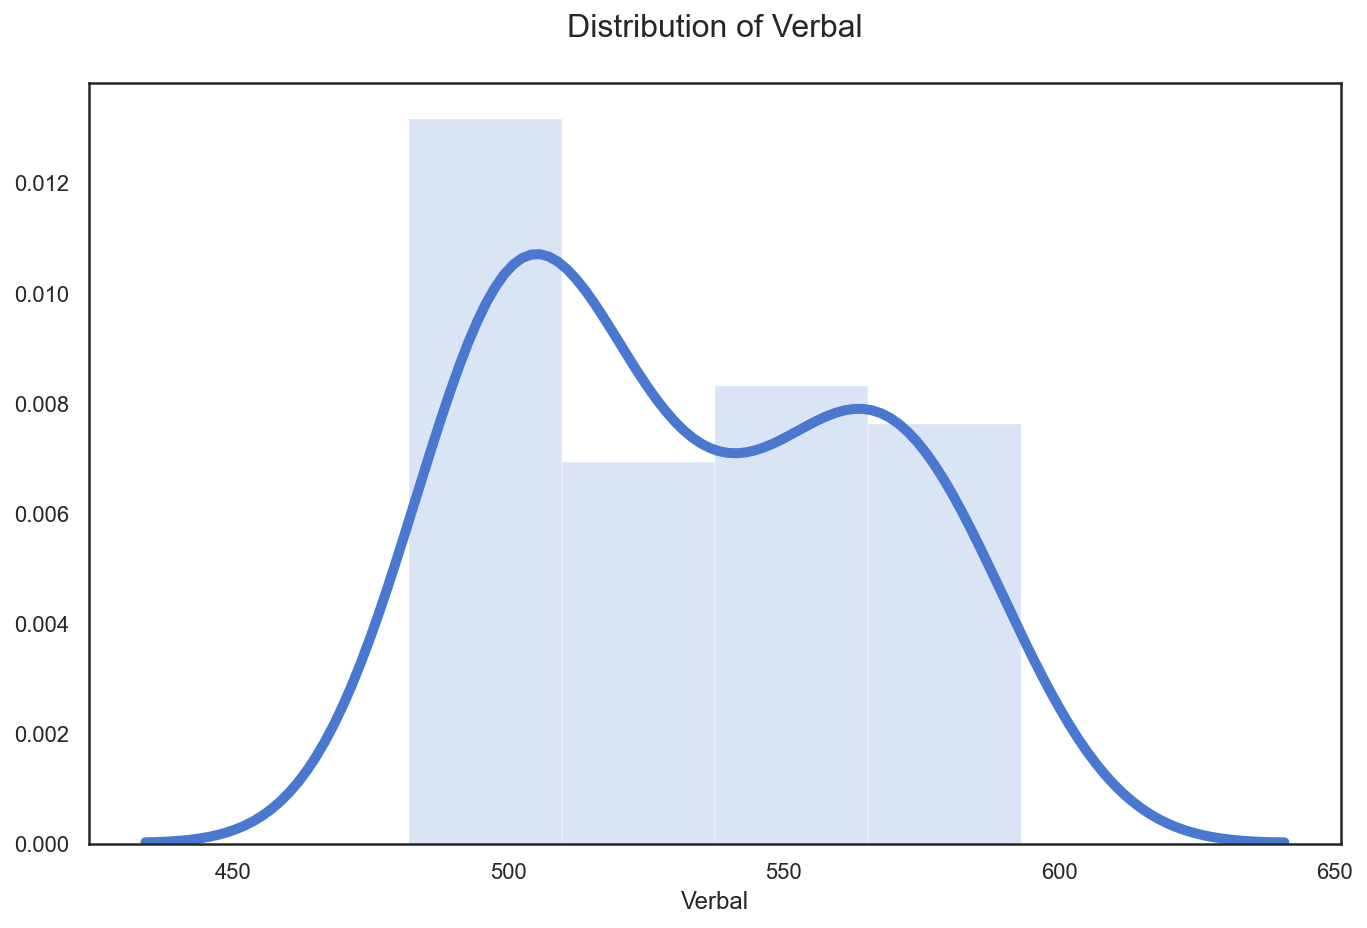

In [27]:
distribution_plotter('Verbal',sats)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

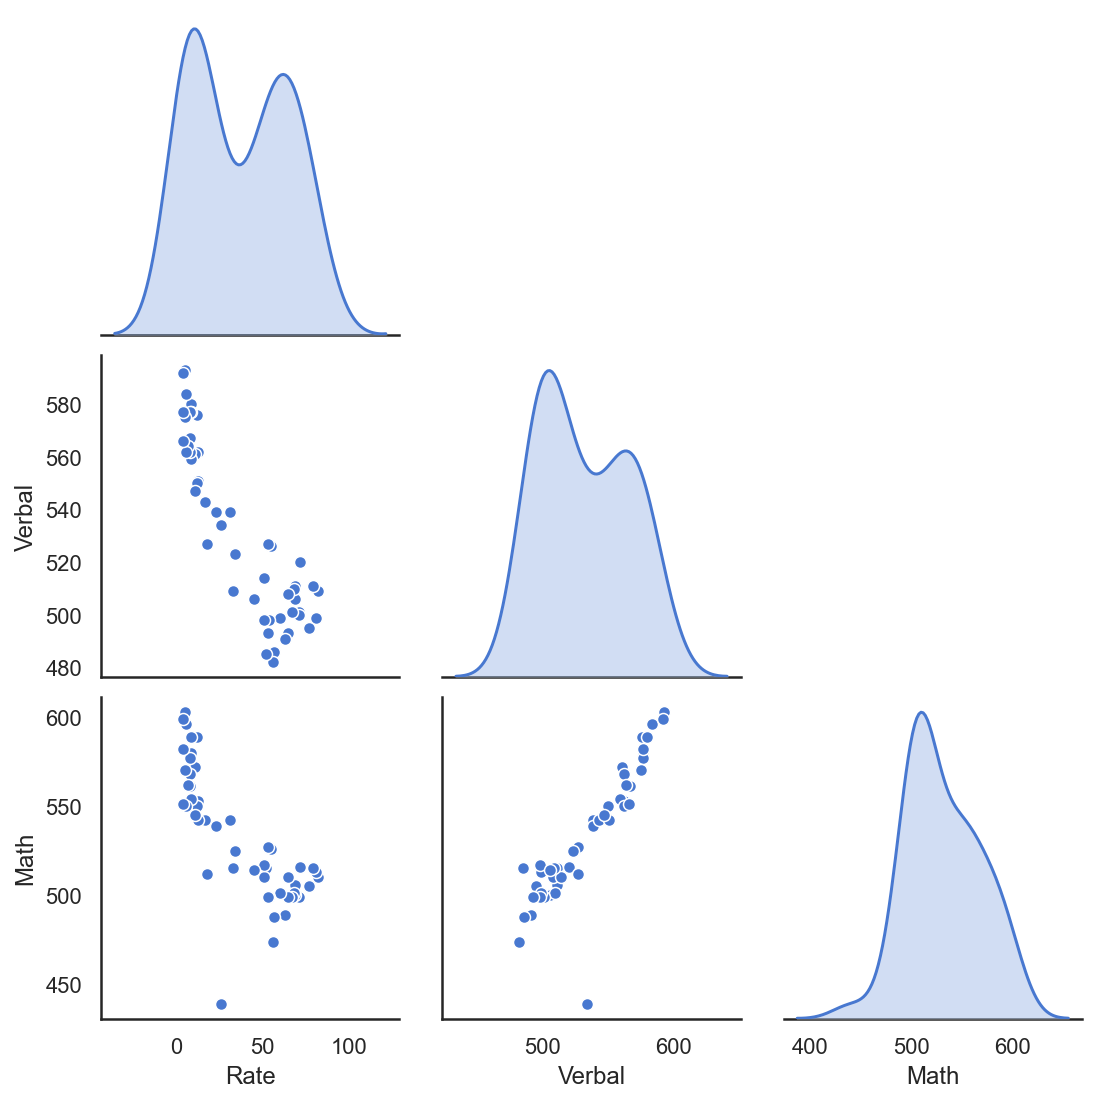

In [28]:
sns.pairplot(sats, diag_kind='kde', corner=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

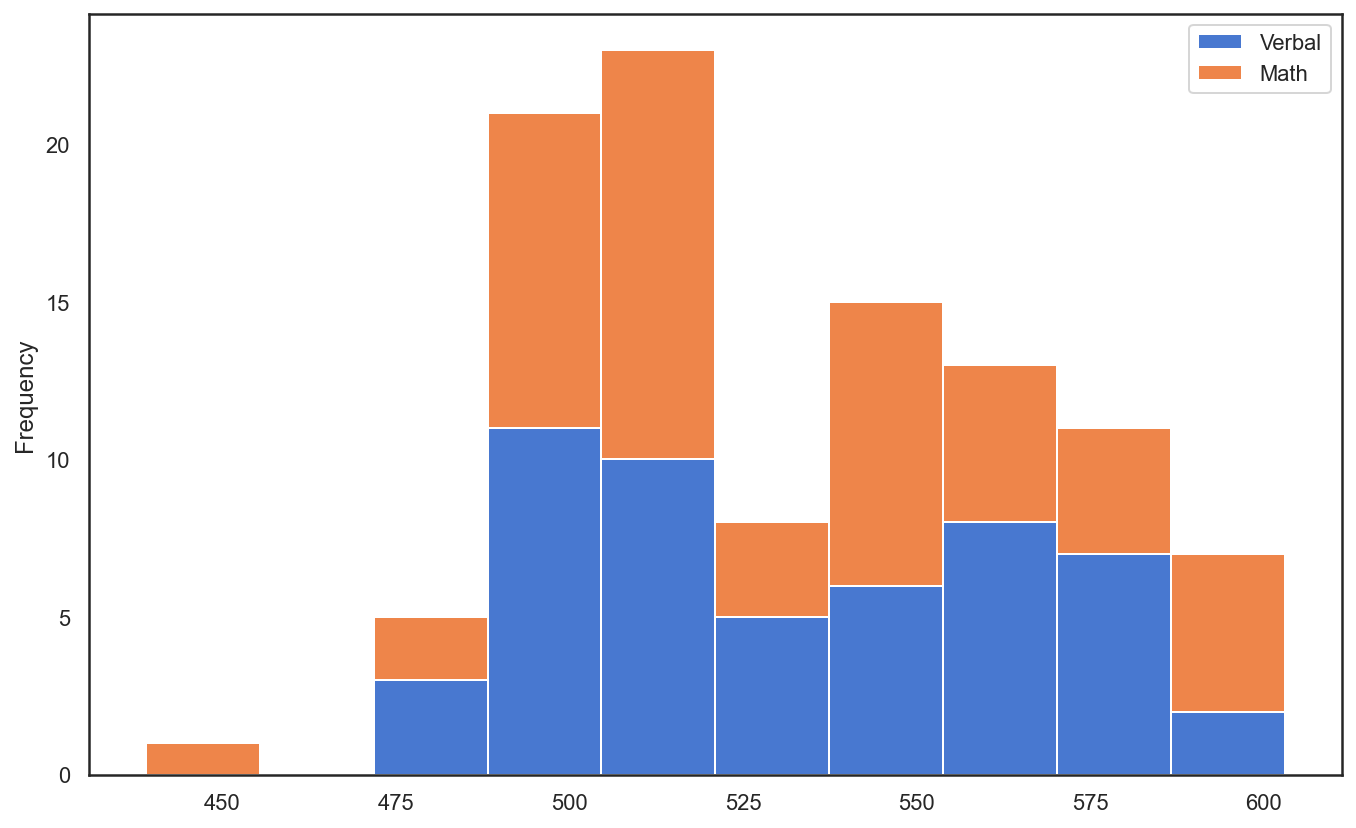

In [29]:
sats[['Verbal','Math']].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

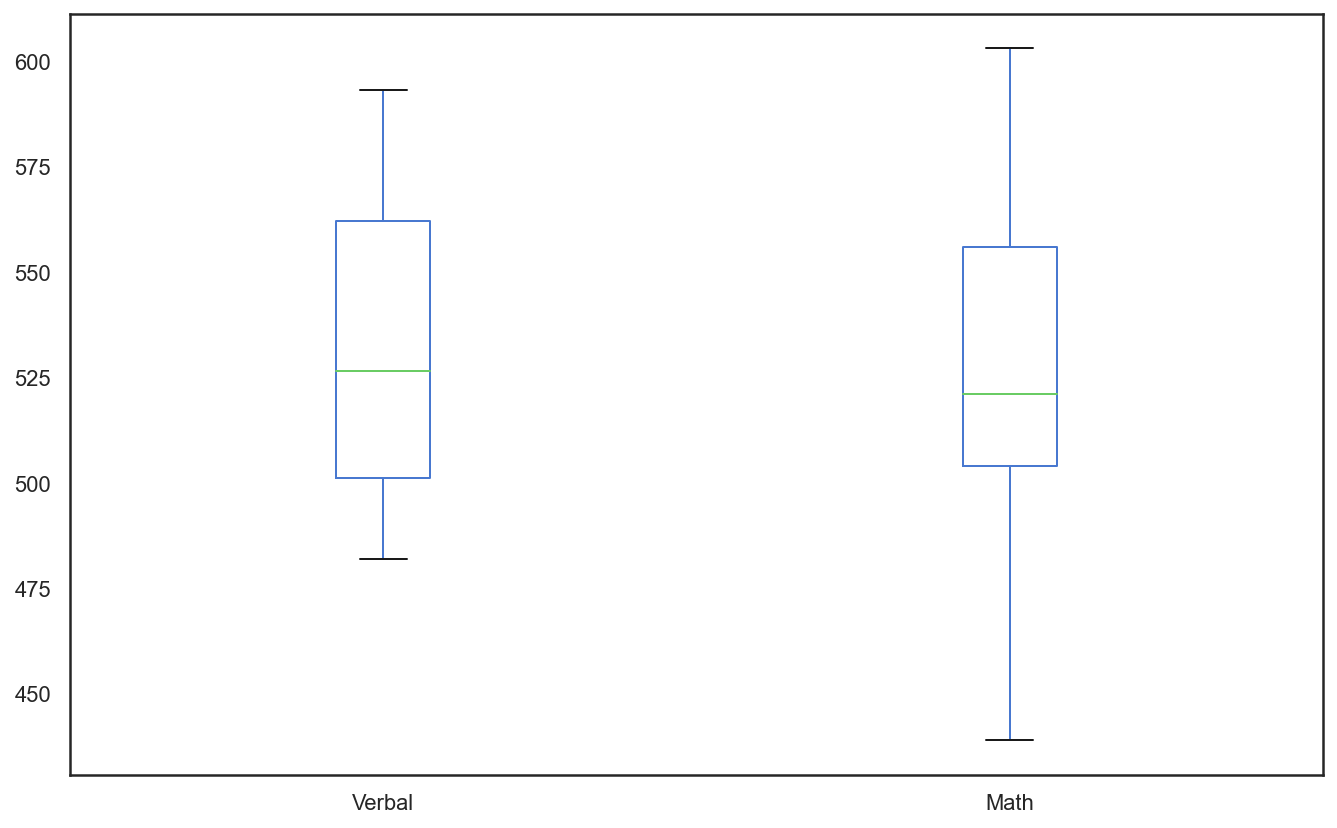

In [30]:
sats[['Verbal', 'Math']].plot.box(by= 'Rate')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


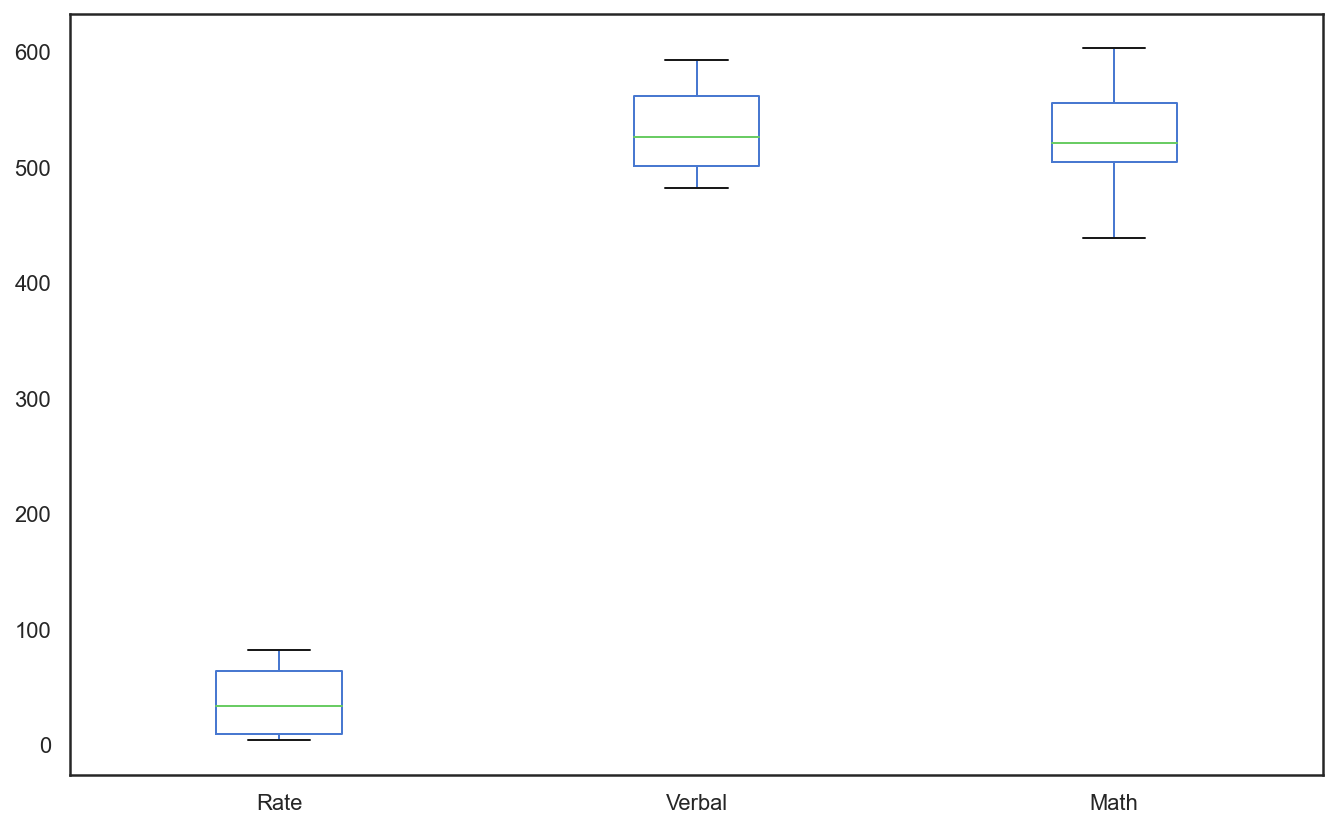

In [31]:
sats.plot.box()

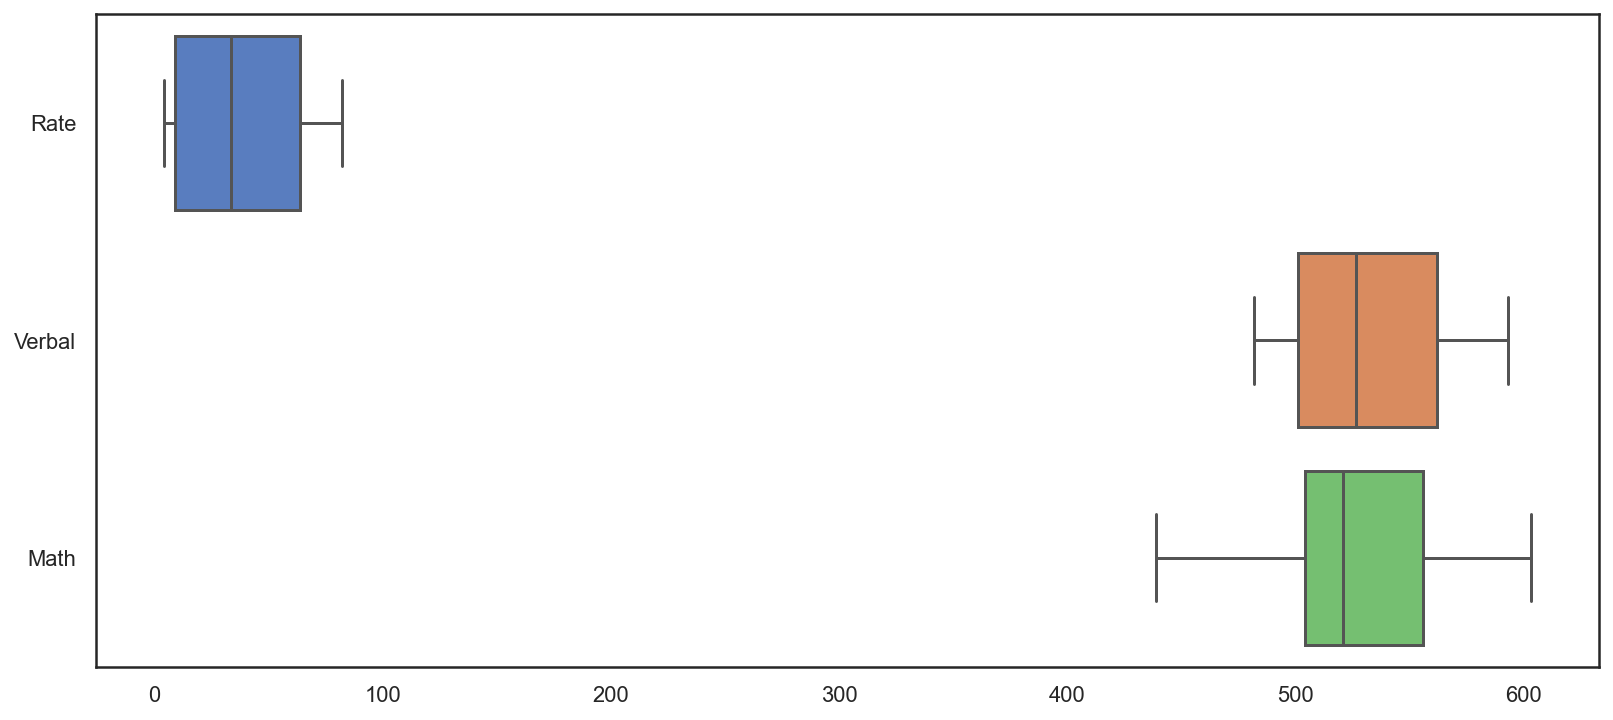

In [32]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
ax = sns.boxplot(data = sats, orient = 'h', notch = False)
plt.show()

In [33]:
sats_std = (sats - sats.mean())/sats.std()

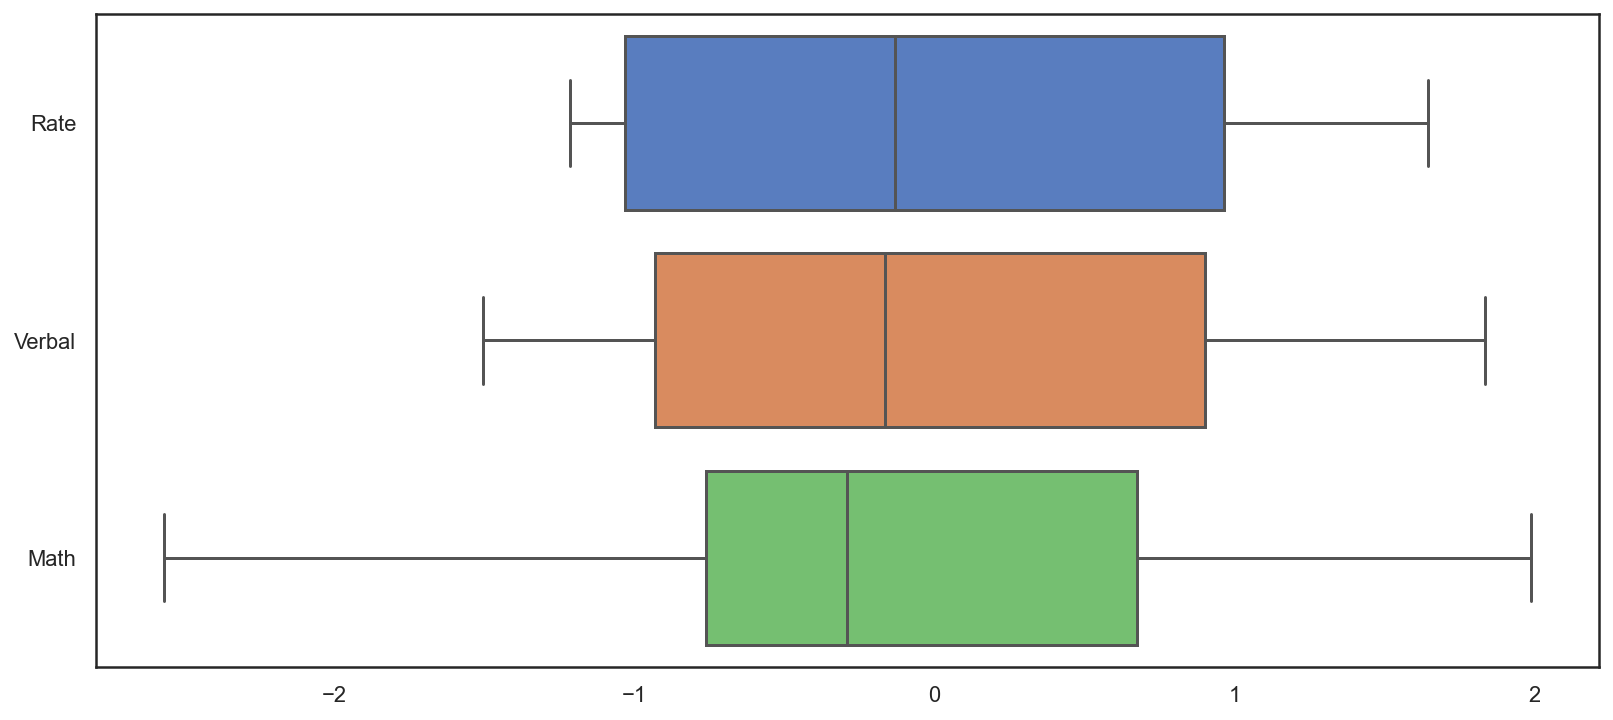

In [34]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
ax = sns.boxplot(data = sats_std, orient = 'h', notch = False)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [35]:
sats.loc[sats.Verbal > sats['Verbal'].mean()]

,Rate,Verbal,Math
State,,,
CO,31,539,542
OH,26,534,439
MT,23,539,539
ID,17,543,542
TN,13,562,553
NM,13,551,542
IL,12,576,589
KY,12,550,550
WY,11,547,545


In [36]:
#finding the mean of Verbal scores
sats[sats.Verbal>sats['Verbal'].mean()]

,Rate,Verbal,Math
State,,,
CO,31,539,542
OH,26,534,439
MT,23,539,539
ID,17,543,542
TN,13,562,553
NM,13,551,542
IL,12,576,589
KY,12,550,550
WY,11,547,545


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [37]:
sats[sats.Verbal>sats['Verbal'].median()]

,Rate,Verbal,Math
State,,,
WA,53,527,527
CO,31,539,542
OH,26,534,439
MT,23,539,539
WV,18,527,512
ID,17,543,542
TN,13,562,553
NM,13,551,542
IL,12,576,589


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [38]:
sats['V-M']=sats['Verbal'].sub(sats['Math'])
sats

,Rate,Verbal,Math,V-M
State,,,,
CT,82,509,510,-1
NJ,81,499,513,-14
MA,79,511,515,-4
NY,77,495,505,-10
NH,72,520,516,4
RI,71,501,499,2
PA,71,500,499,1
VT,69,511,506,5
ME,69,506,500,6


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

Things to do: write the code to identify which states have highest greater than scores. Sorted highest to lowest
Idea! : Use the newly found verbal-math score. The larger the number in that score is the highest V>M score. The lowest(most negative) is the highest M>V score.

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [39]:
save = sats.corr()
save

,Rate,Verbal,Math,V-M
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
V-M,-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [40]:
sats.describe()

,Rate,Verbal,Math,V-M
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [41]:
# initial upload, 17 rows, 28 columns. Same length of time, over 12 months. Half the data is a percentage, other half is a Median number.
# Age is an Object because of variables such as 34-35.
# N is an Integer
# The rest should be Float, yet 6 Columns are classed as Objects, there must be missing data and these will need to be fixed.

Data Dictionary:
Header	Definition
alcohol-use	Percentage of those in an age group who used alcohol in the past 12 months
alcohol-frequency	Median number of times a user in an age group used alcohol in the past 12 months
marijuana-use	Percentage of those in an age group who used marijuana in the past 12 months
marijuana-frequency	Median number of times a user in an age group used marijuana in the past 12 months
cocaine-use	Percentage of those in an age group who used cocaine in the past 12 months
cocaine-frequency	Median number of times a user in an age group used cocaine in the past 12 months
crack-use	Percentage of those in an age group who used crack in the past 12 months
crack-frequency	Median number of times a user in an age group used crack in the past 12 months
heroin-use	Percentage of those in an age group who used heroin in the past 12 months
heroin-frequency	Median number of times a user in an age group used heroin in the past 12 months
hallucinogen-use	Percentage of those in an age group who used hallucinogens in the past 12 months
hallucinogen-frequency	Median number of times a user in an age group used hallucinogens in the past 12 months
inhalant-use	Percentage of those in an age group who used inhalants in the past 12 months
inhalant-frequency	Median number of times a user in an age group used inhalants in the past 12 months
pain-releiver-use	Percentage of those in an age group who used pain relievers in the past 12 months
pain-releiver-frequency	Median number of times a user in an age group used pain relievers in the past 12 months
oxycontin-use	Percentage of those in an age group who used oxycontin in the past 12 months
oxycontin-frequency	Median number of times a user in an age group used oxycontin in the past 12 months
tranquilizer-use	Percentage of those in an age group who used tranquilizer in the past 12 months
tranquilizer-frequency	Median number of times a user in an age group used tranquilizer in the past 12 months
stimulant-use	Percentage of those in an age group who used stimulants in the past 12 months
stimulant-frequency	Median number of times a user in an age group used stimulants in the past 12 months
meth-use	Percentage of those in an age group who used meth in the past 12 months
meth-frequency	Median number of times a user in an age group used meth in the past 12 months
sedative-use	Percentage of those in an age group who used sedatives in the past 12 months
sedative-frequency	Median number of times a user in an age group used sedatives in the past 12 months

In [2]:
#Going to make age as my index.
drugs = pd.read_csv('./drug-use-by-age.csv',index_col = 0)
drugs

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [3]:
# Column names need to be changed to have _ instead of - between words.
drugs.rename(columns={
        'n':'n',
        'alcohol-use':'alcohol_use',
        'alcohol-frequency':'alcohol_frequency',
        'marijuana-use':'marijuana_use',
        'marijuana-frequency':'marijuana_frequency',
        'cocaine-use':'cocaine_use',
        'cocaine-frequency':'cocaine_frequency',
        'crack-use':'crack_use',
        'crack-frequency':'crack_frequency',
        'heroin-use':'heroin_use',
        'heroin-frequency':'heroin_frequency',
        'hallucinogen-use':'hallucinogen_use',
        'hallucinogen-frequency':'hallucinogen_frequency',
        'inhalant-use':'inhalant_use',
        'inhalant-frequency':'inhalant_frequency',
        'pain-releiver-use':'pain_releiver_use',
        'pain-releiver-frequency':'pain_releiver_frequency',
        'oxycontin-use':'oxycontin_use',
        'oxycontin-frequency':'oxycontin_frequency',
        'tranquilizer-use':'tranquilizer_use',
        'tranquilizer-frequency':'tranquilizer_frequency',
        'stimulant-use':'stimulant_use',
        'stimulant-frequency':'stimulant_frequency',
        'meth-use':'meth_use',
        'meth-frequency':'meth_frequency',
        'sedative-use':'sedative_use',
        'sedative-frequency':'sedative_frequency', 
    }, inplace=True)
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 12 to 65+
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n                        17 non-null     int64  
 1   alcohol_use              17 non-null     float64
 2   alcohol_frequency        17 non-null     float64
 3   marijuana_use            17 non-null     float64
 4   marijuana_frequency      17 non-null     float64
 5   cocaine_use              17 non-null     float64
 6   cocaine_frequency        17 non-null     object 
 7   crack_use                17 non-null     float64
 8   crack_frequency          17 non-null     object 
 9   heroin_use               17 non-null     float64
 10  heroin_frequency         17 non-null     object 
 11  hallucinogen_use         17 non-null     float64
 12  hallucinogen_frequency   17 non-null     float64
 13  inhalant_use             17 non-null     float64
 14  inhalant_frequency       17 non

In [4]:
# contains a '-' data that makes the array an object data type.
drugs.cocaine_frequency.unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [5]:
drugs.cocaine_frequency = drugs.cocaine_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.crack_frequency = drugs.crack_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.heroin_frequency = drugs.heroin_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.inhalant_frequency = drugs.inhalant_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.oxycontin_frequency = drugs.oxycontin_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.meth_frequency = drugs.meth_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs

,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [6]:
#Check that everything is float now.
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 12 to 65+
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n                        17 non-null     int64  
 1   alcohol_use              17 non-null     float64
 2   alcohol_frequency        17 non-null     float64
 3   marijuana_use            17 non-null     float64
 4   marijuana_frequency      17 non-null     float64
 5   cocaine_use              17 non-null     float64
 6   cocaine_frequency        16 non-null     float64
 7   crack_use                17 non-null     float64
 8   crack_frequency          14 non-null     float64
 9   heroin_use               17 non-null     float64
 10  heroin_frequency         16 non-null     float64
 11  hallucinogen_use         17 non-null     float64
 12  hallucinogen_frequency   17 non-null     float64
 13  inhalant_use             17 non-null     float64
 14  inhalant_frequency       16 non

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [47]:
drugs

,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [48]:
sns.pairplot(drugs, diag_kind='kde', corner=True)

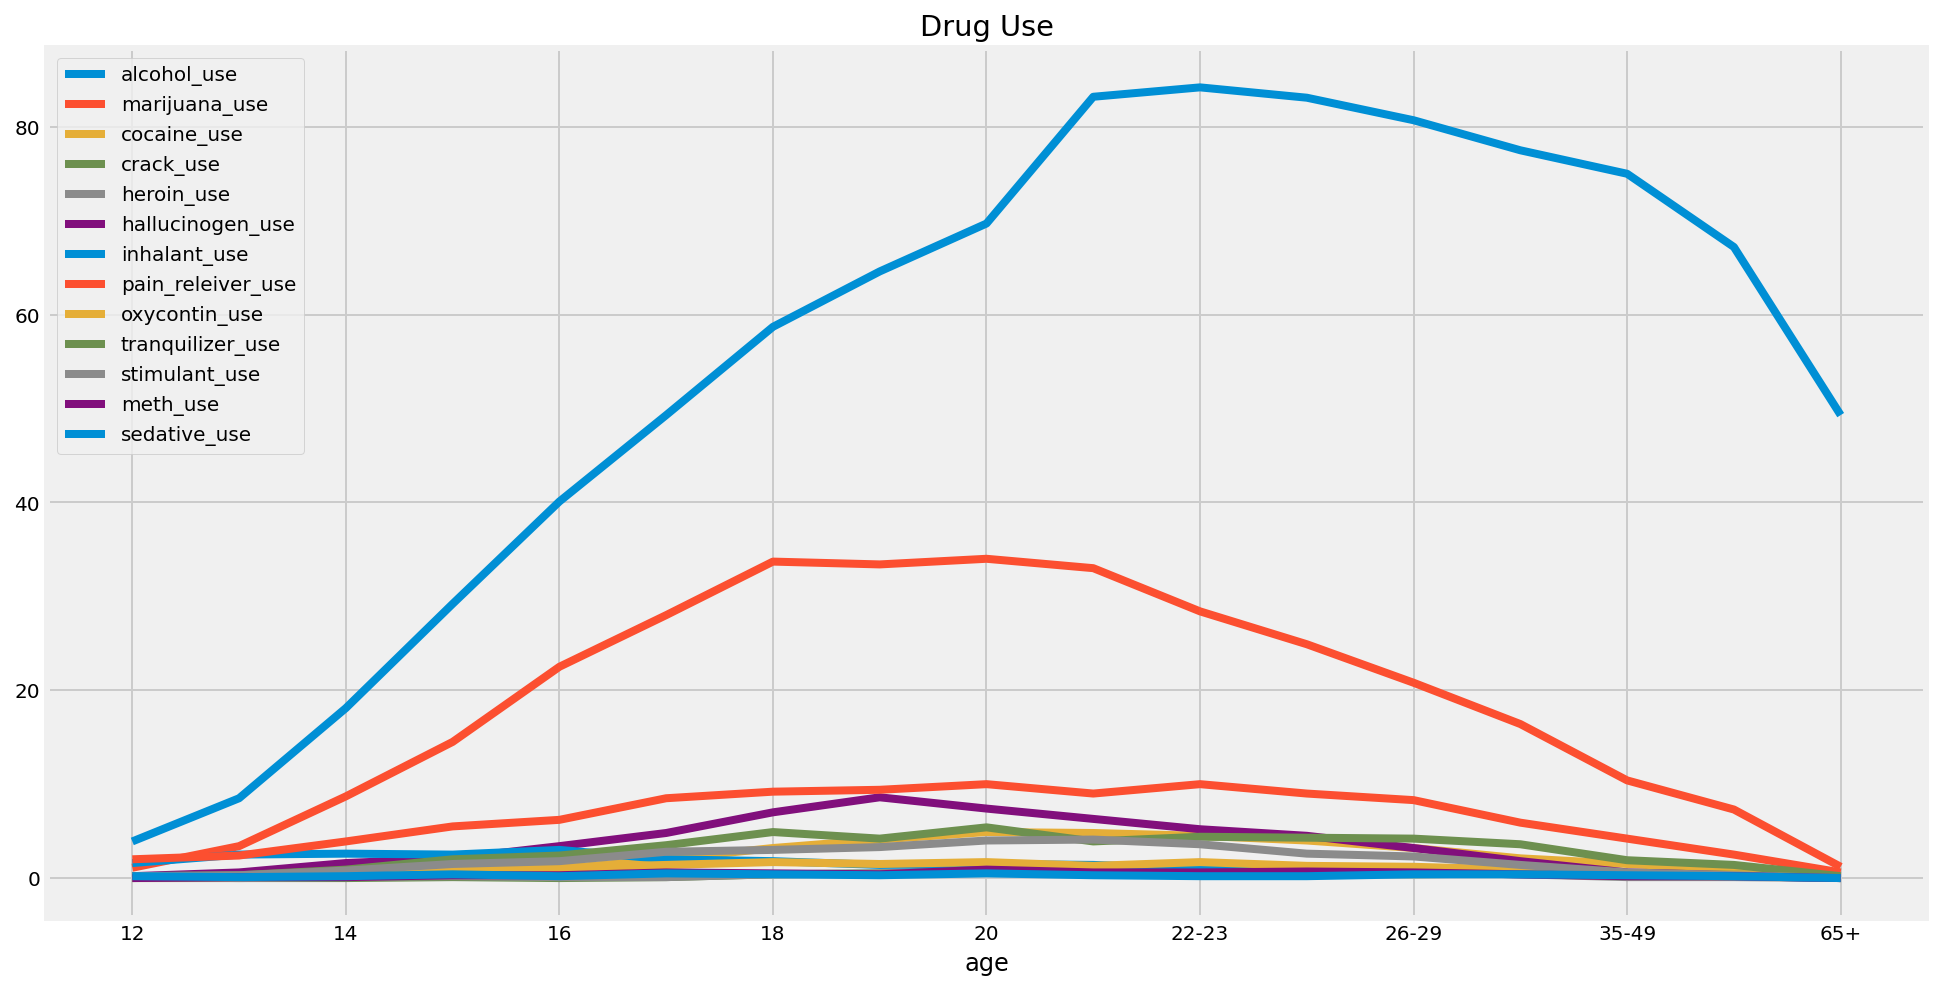

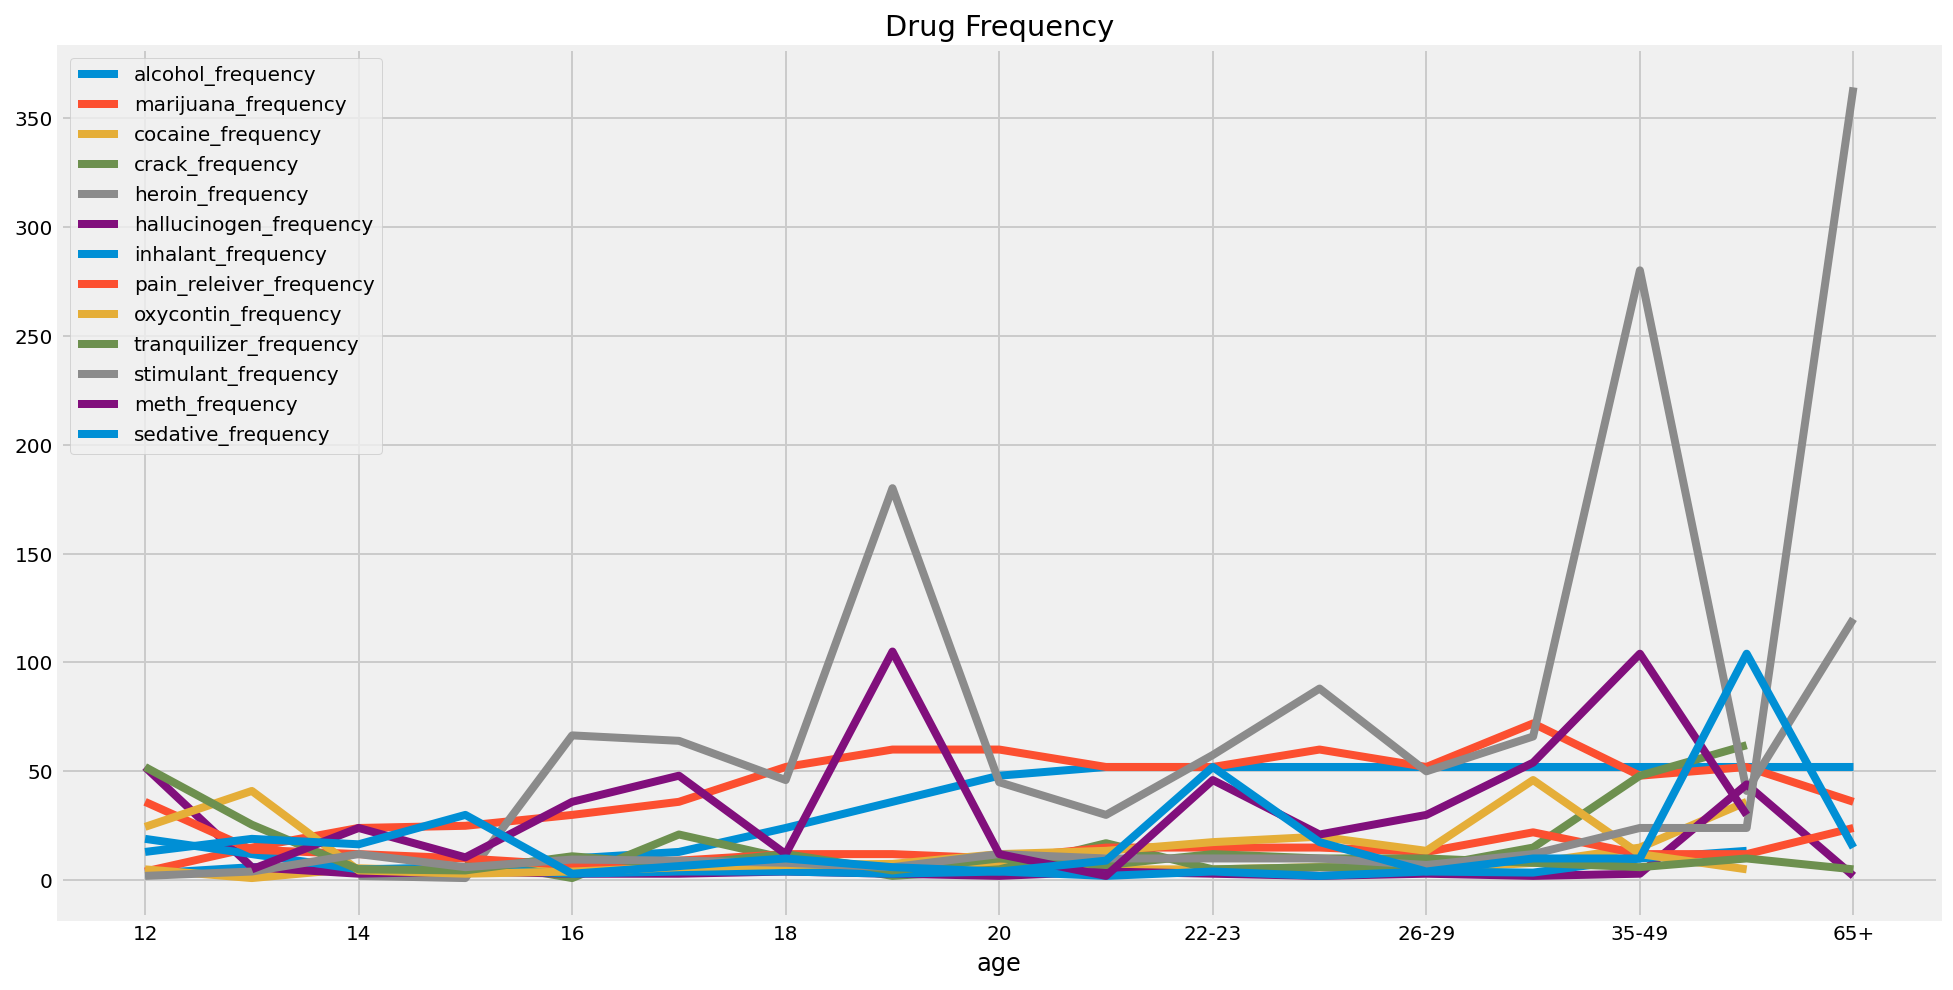

In [7]:
duse = drugs[['alcohol_use','marijuana_use','cocaine_use','crack_use','heroin_use','hallucinogen_use','inhalant_use','pain_releiver_use','oxycontin_use','tranquilizer_use','stimulant_use','meth_use','sedative_use']]
dfreq = drugs[['alcohol_frequency','marijuana_frequency','cocaine_frequency','crack_frequency','heroin_frequency','hallucinogen_frequency','inhalant_frequency','pain_releiver_frequency','oxycontin_frequency','tranquilizer_frequency','stimulant_frequency','meth_frequency','sedative_frequency']]
duse.plot(title='Drug Use',figsize=(15,8))
dfreq.plot(figsize=(15,8),title='Drug Frequency')


In [50]:
duse.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol_use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
marijuana_use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
cocaine_use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack_use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin_use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen_use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
inhalant_use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0
pain_releiver_use,17.0,6.270588,3.166379,0.6,3.9,6.2,9.0,10.0
oxycontin_use,17.0,0.935294,0.608216,0.0,0.4,1.1,1.4,1.7
tranquilizer_use,17.0,2.805882,1.753379,0.2,1.4,3.5,4.2,5.4


In [51]:
dfreq.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol_frequency,17.0,33.352941,21.318833,3.0,10.000,48.00,52.000,52.0
marijuana_frequency,17.0,42.941176,18.362566,4.0,30.000,52.00,52.000,72.0
cocaine_frequency,16.0,7.875000,8.038449,1.0,5.000,5.25,7.250,36.0
crack_frequency,14.0,15.035714,18.111263,1.0,5.000,7.75,16.500,62.0
heroin_frequency,16.0,73.281250,70.090173,1.0,39.625,53.75,71.875,280.0
hallucinogen_frequency,17.0,8.411765,15.000245,2.0,3.000,3.00,4.000,52.0
inhalant_frequency,16.0,6.156250,4.860448,2.0,3.375,4.00,6.625,19.0
pain_releiver_frequency,17.0,14.705882,6.935098,7.0,12.000,12.00,15.000,36.0
oxycontin_frequency,16.0,14.812500,12.798275,3.0,5.750,12.00,18.125,46.0
tranquilizer_frequency,17.0,11.735294,11.485205,4.5,6.000,10.00,11.000,52.0


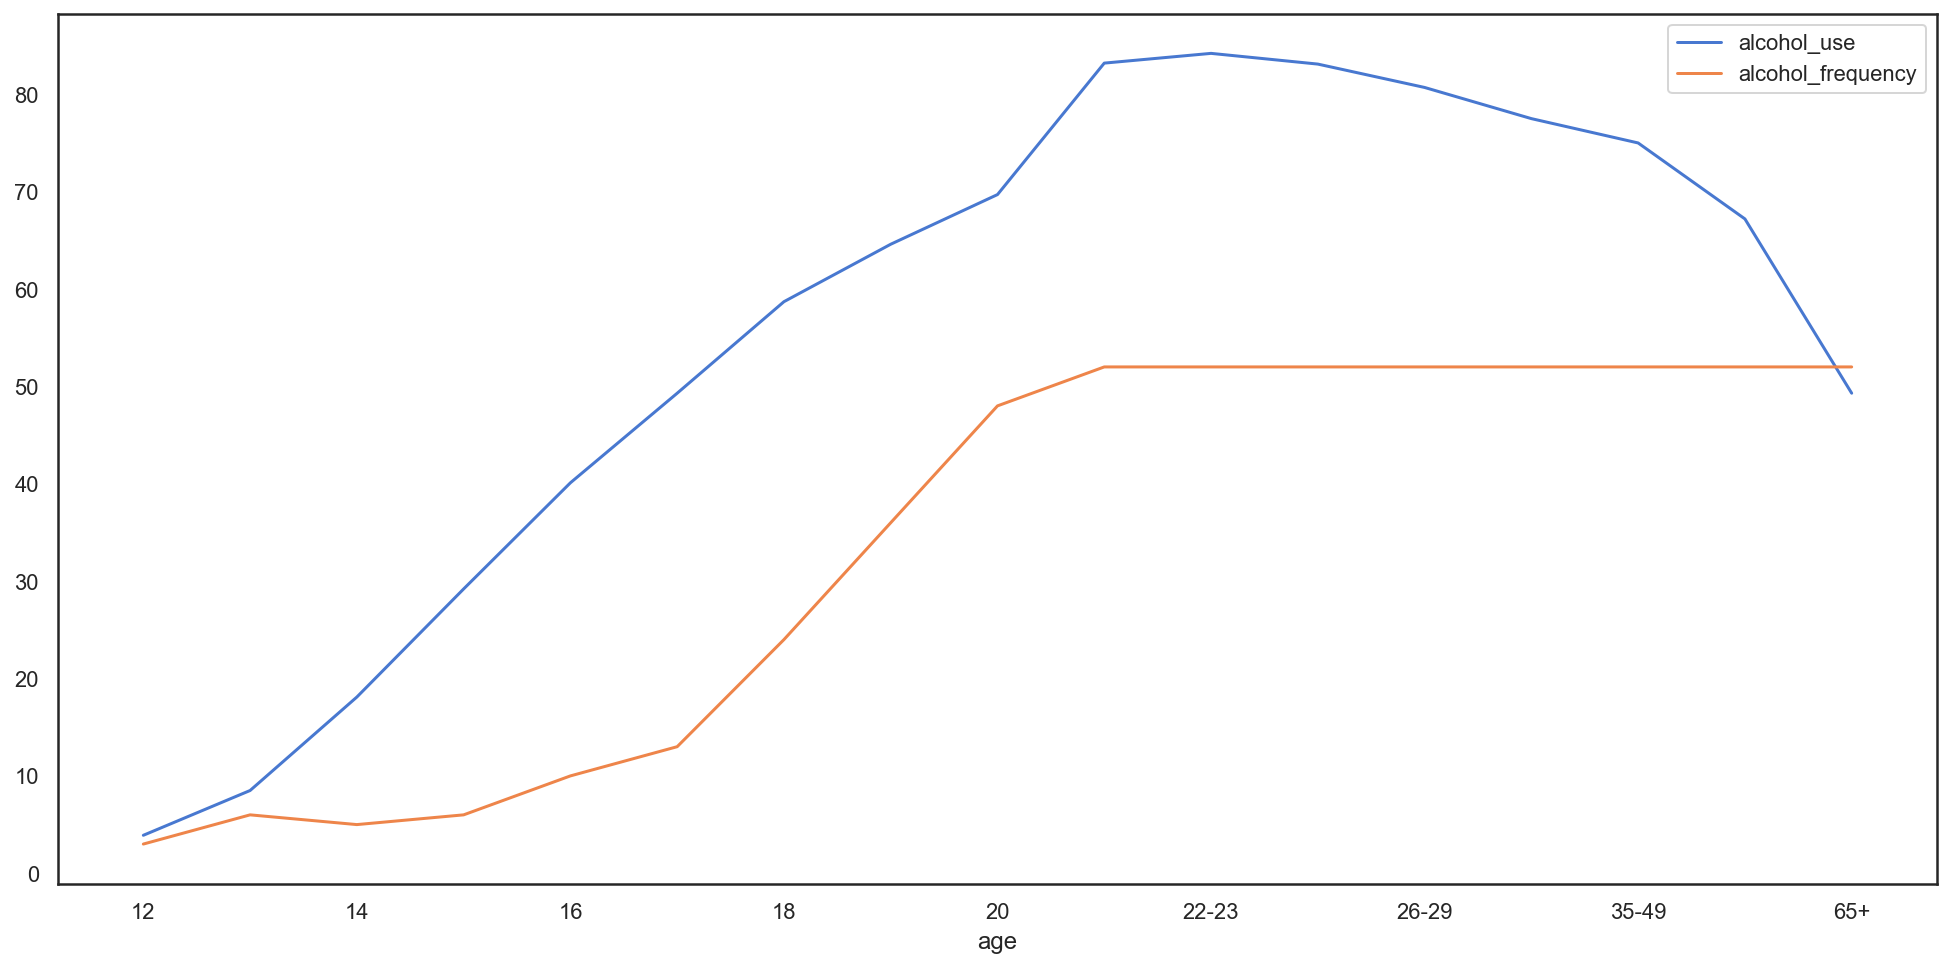

In [52]:
drugs[['alcohol_use','alcohol_frequency']].plot(figsize=(15,8))

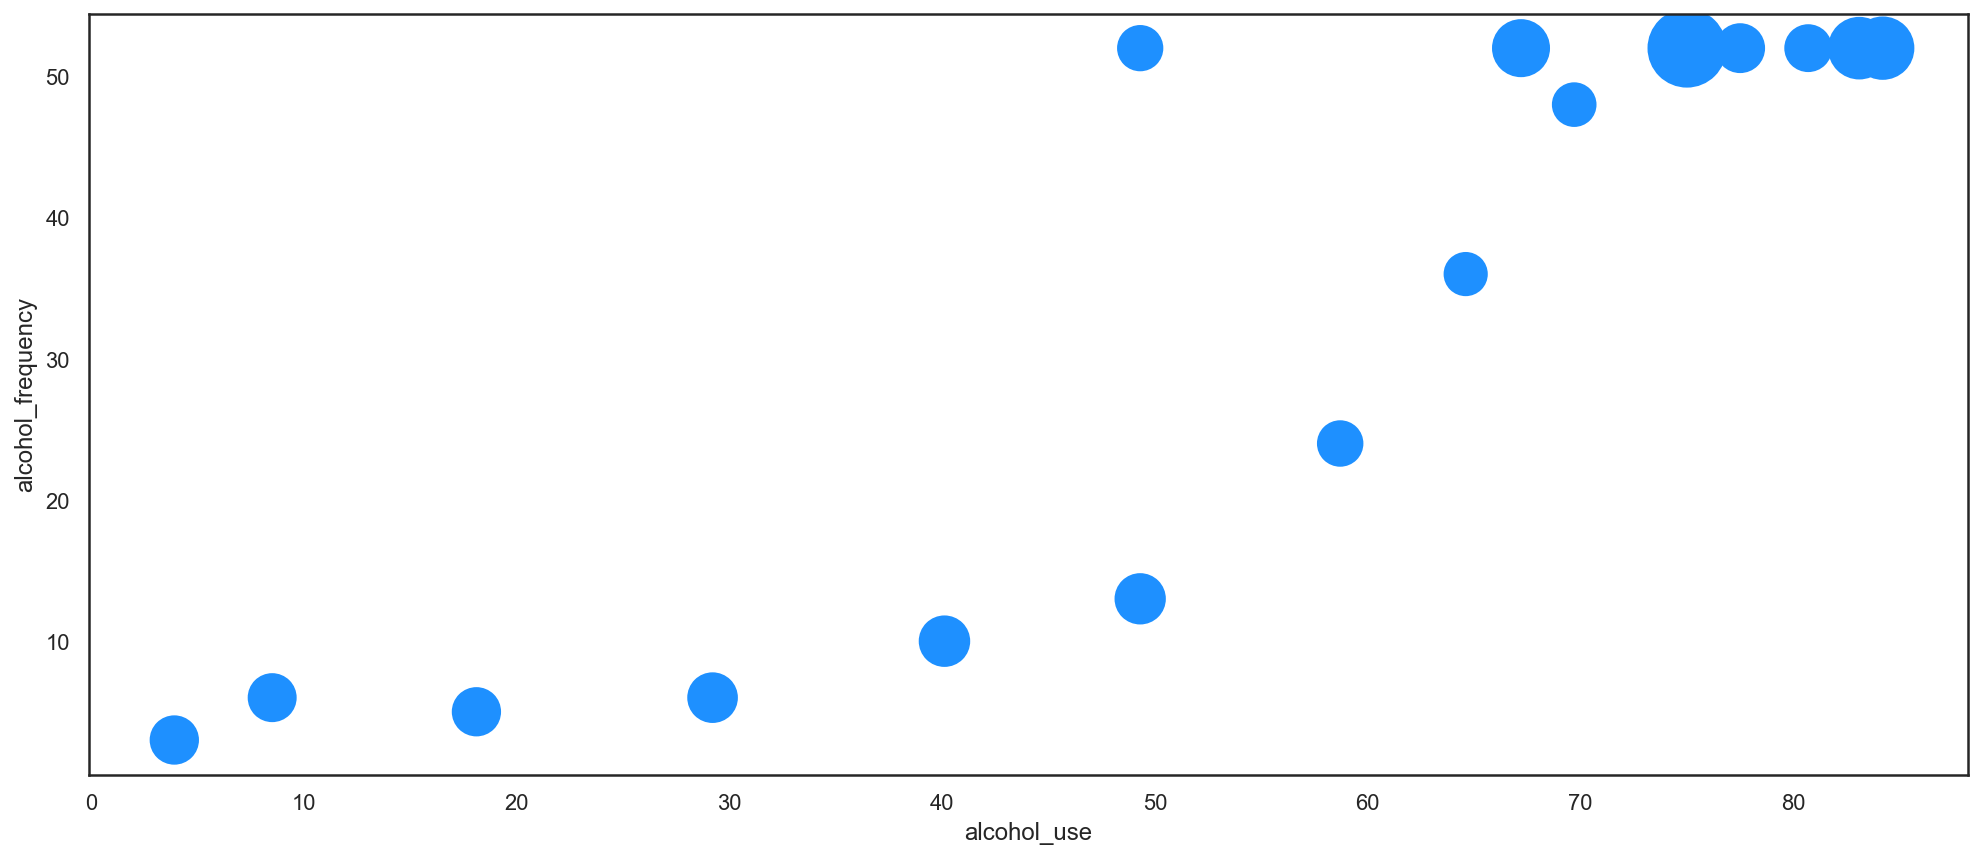

In [53]:
drugs.plot(x='alcohol_use', y='alcohol_frequency', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x/5 for x in drugs['n']])

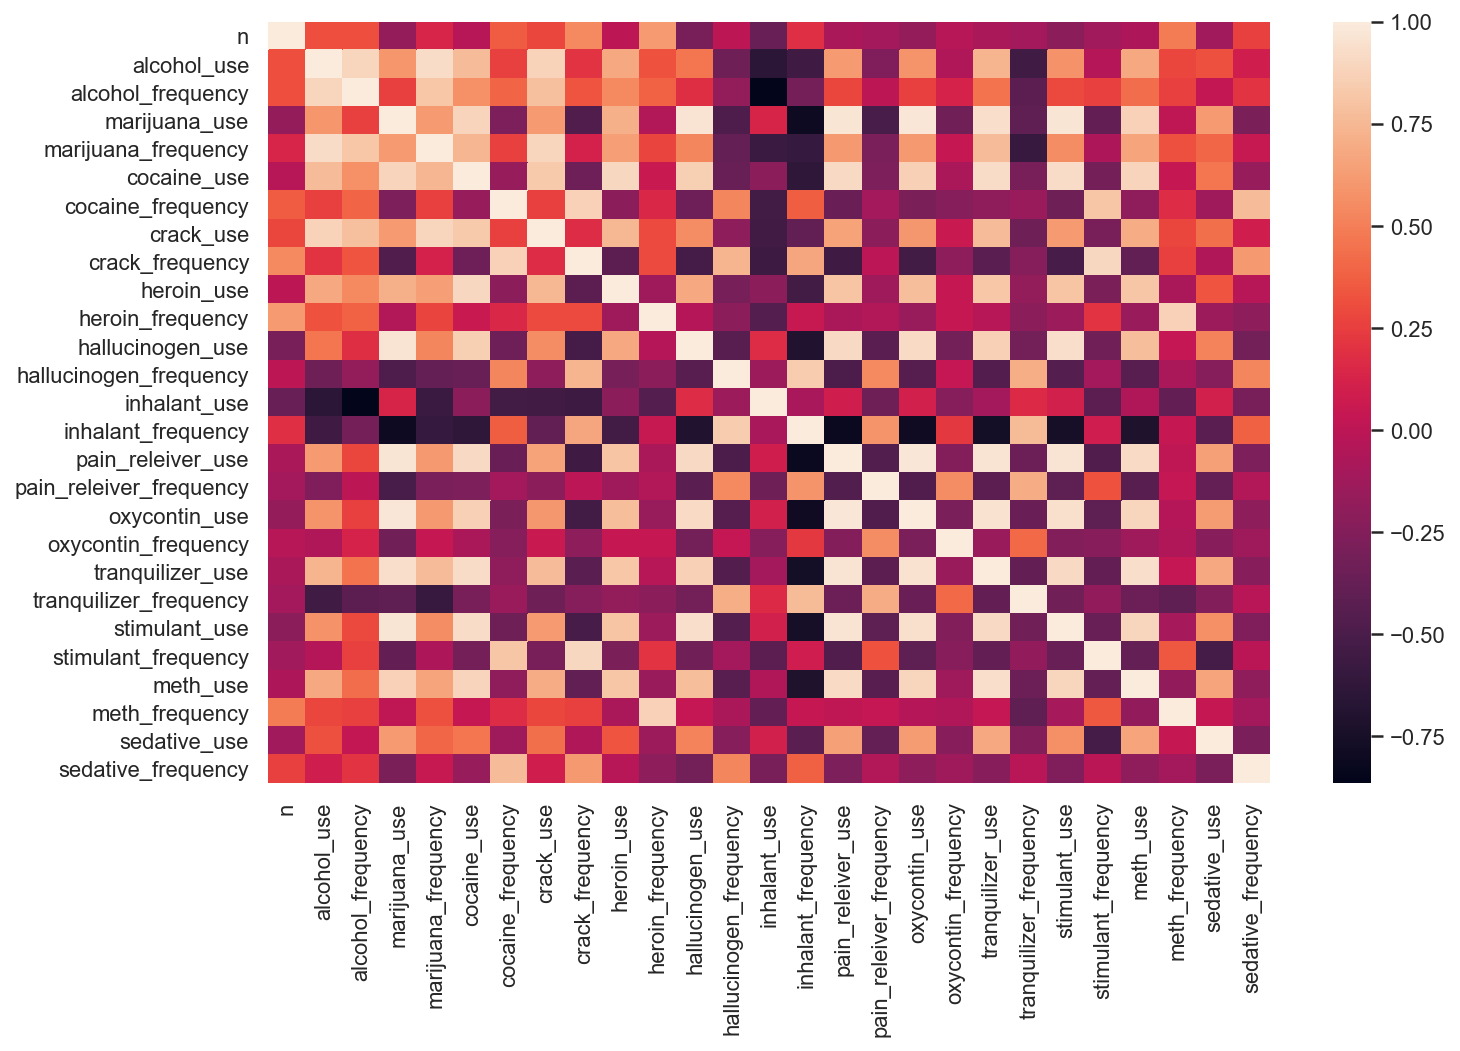

In [54]:
correlations = drugs.corr()
sns.heatmap(correlations)

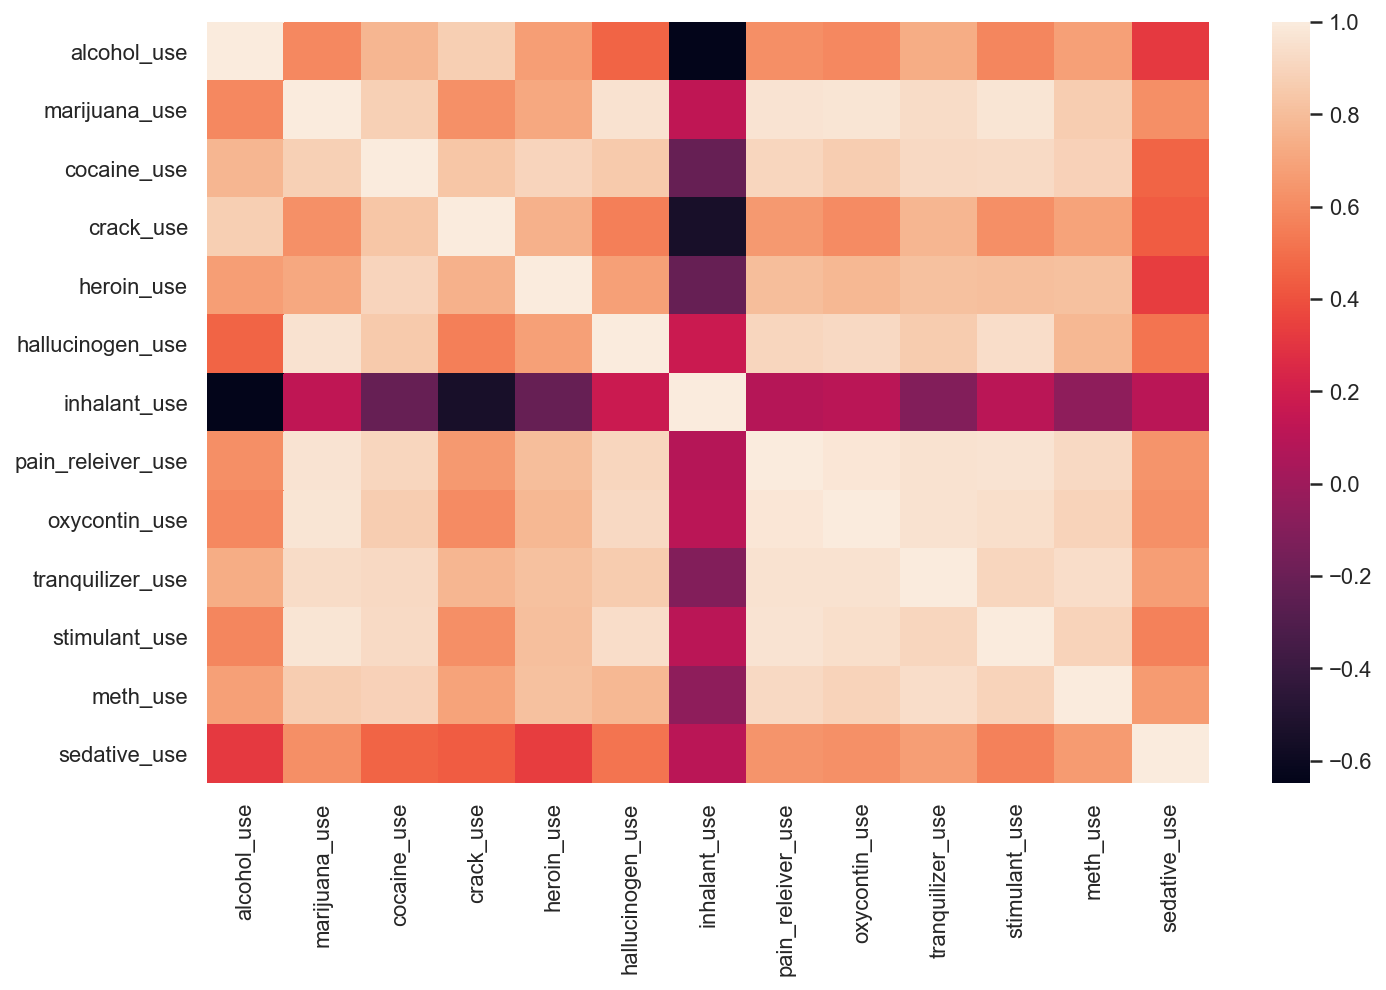

In [55]:
correlations = duse.corr()
sns.heatmap(correlations)

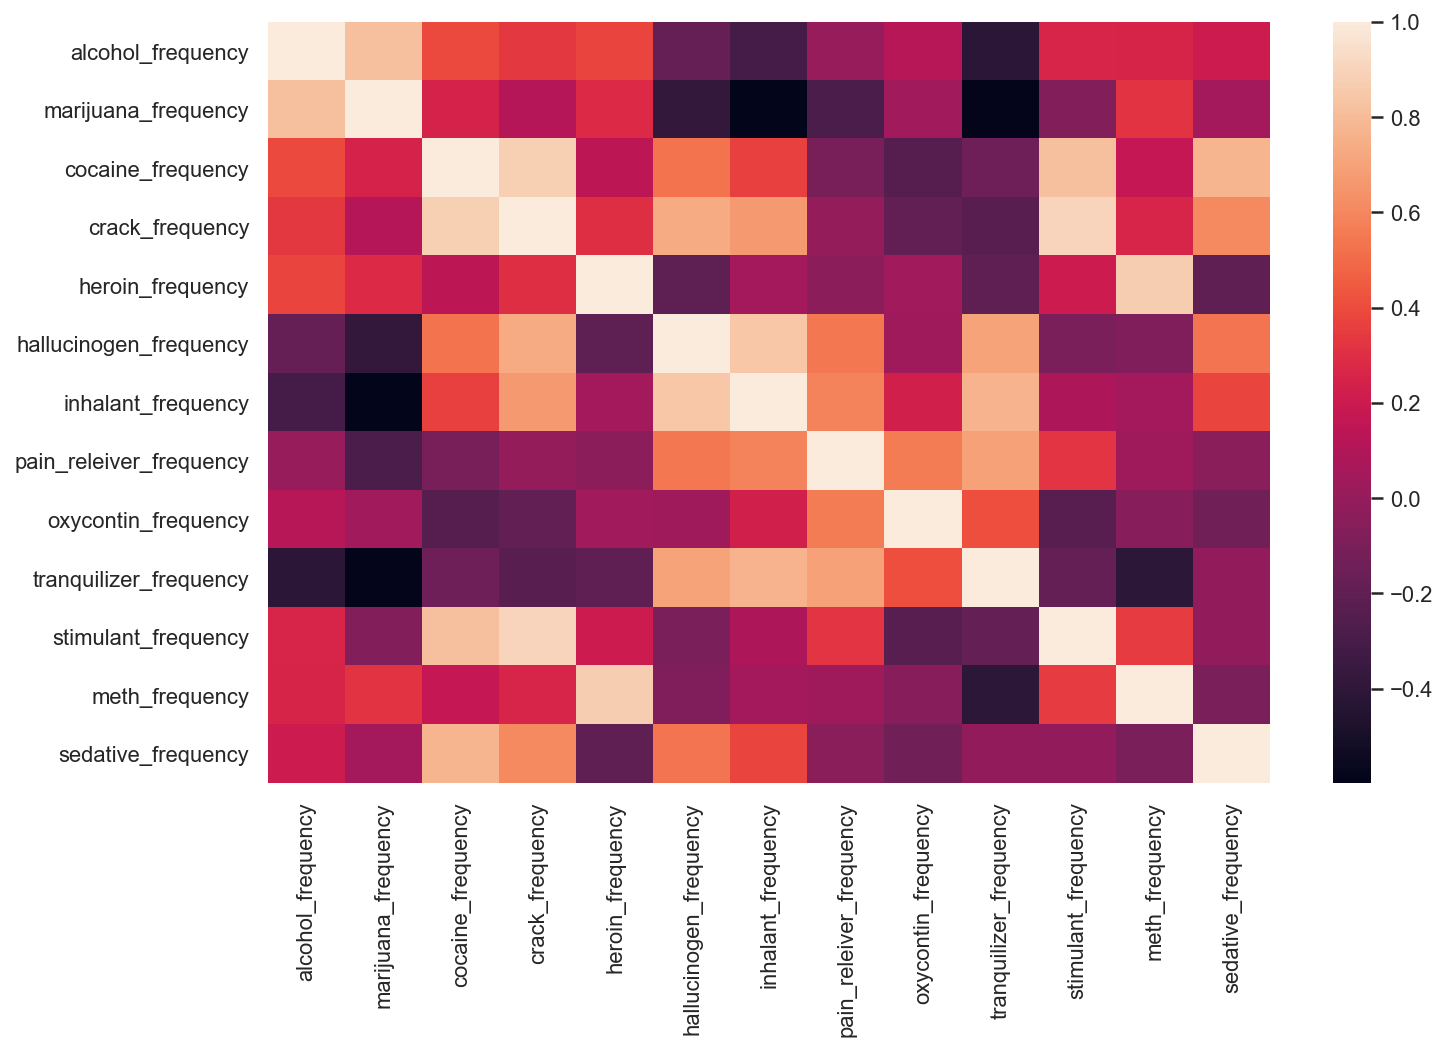

In [56]:
correlations = dfreq.corr()
sns.heatmap(correlations)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [53]:
Data = drugs[['n','alcohol_use','marijuana_use']]
Data

,n,alcohol_use,marijuana_use
age,,,
12,2798,3.9,1.1
13,2757,8.5,3.4
14,2792,18.1,8.7
15,2956,29.2,14.5
16,3058,40.1,22.5
17,3038,49.3,28.0
18,2469,58.7,33.7
19,2223,64.6,33.4
20,2271,69.7,34.0


#Marijuana vs alcohol
I wanted to test to see if there was any significant difference in the frequency usage of Alcohol in comparison to Marijuana.
Unfortunately, because this has already been taken as a median value, the data can not be considered highly accurate.
I will instead focus on the use percentage, which can be expanded back to the number of people using each drug by multiplying by the provided 'n' column if needed.

I will test if the number of users of Alcohol is significantly different to the number of users of Marijuana.

So Null Hypothesis: From the Data, there is no difference in the use of Marijuana, to the use of Alcohol.

H0: The number of Marijuana users is equal to the number of Alcohol users.

H1: The number of Marijuana users differs to the number of Alcohol users.


First we will calculate a t-statistic. The t-statistic is a measure of the degree to which our groups differ standardized by the variance of our measurements.

Secondly we will calculate a p-value. The p-value is a metric that indicates a probability that our measured difference was due to random chance in the sampling of subjects.


In [54]:
Alcohol_Users = np.array(Data['alcohol_use'])
Marijuana_Users = np.array(Data['marijuana_use'])
print(np.mean(Alcohol_Users))
print(np.mean(Marijuana_Users))
print(np.mean(Marijuana_Users)-np.mean(Alcohol_Users))

55.42941176470588
18.923529411764704
-36.50588235294118


Taking Alcohol Users as the Null, means that I am taking Alcohol to be the assumed true mean in the case of my experiment.

In [55]:
mean_difference = np.mean(Marijuana_Users)-np.mean(Alcohol_Users)

In [56]:
def generate_group(mean, std, n):
    return np.random.normal(mean, std, size=n)

In [63]:
g1 = generate_group(np.mean(Alcohol_Users),np.std(Alcohol_Users), 500)
g2 = generate_group(np.mean(Marijuana_Users),np.std(Marijuana_Users), 500)

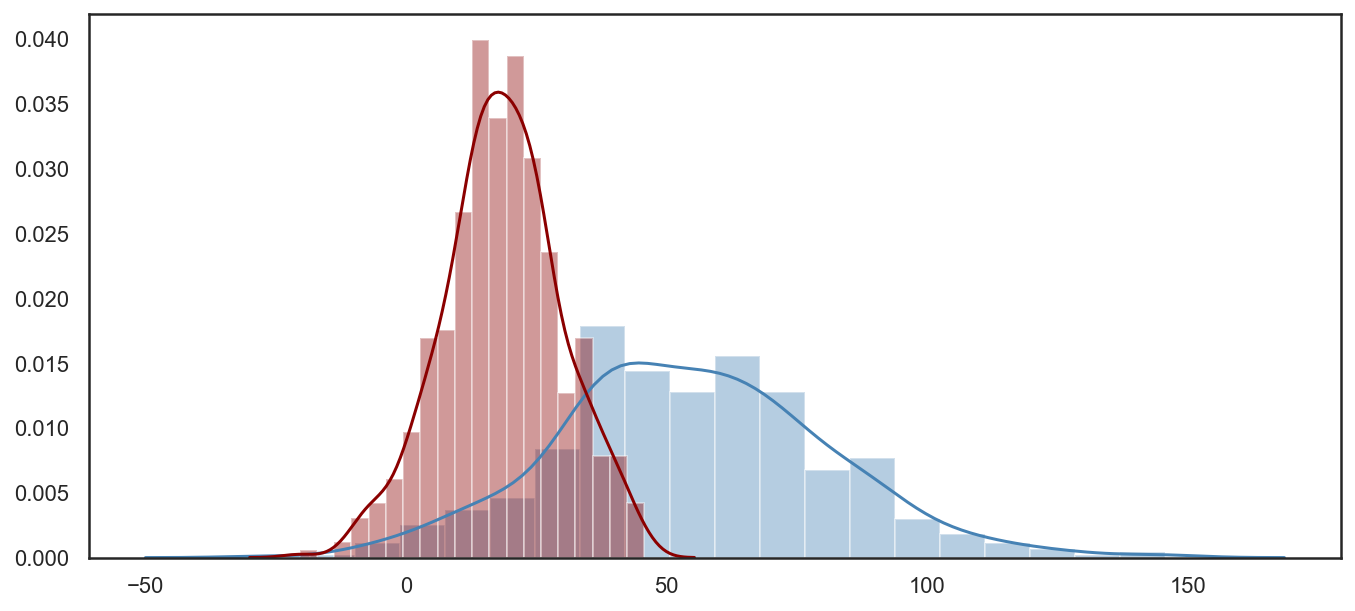

In [64]:
# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(10,5))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:
# first plot group 1:
ax = sns.distplot(g1, bins=20, color='steelblue', ax=ax)

# create another distribution on the same axis for group 2:
sns.distplot(g2, bins=20, color='darkred', ax=ax)

In [66]:
stats.ttest_ind(Marijuana_freq, Alcohol_freq)

Ttest_indResult(statistic=1.4050418979783086, pvalue=0.169642784061864)

In [67]:
## Step 1: Define hypotheses.
### H0: M = A
### H1: M != A

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = np.mean(Marijuana_Users)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - np.mean(Alcohol_Users))/(np.std(Marijuana_Users, ddof=1)/len(Marijuana_Users)**0.5)

## Step 5: Find p-value.
## t.sf is survival function, which is 1-cdf at a given value 
## (proportion of values at least as extreme as...)
p_value = stats.t.sf(np.abs(t_statistic), len(Marijuana_Users)) * 2 


## Because our alternative hypothesis is != (rather than greater than or less than),
## we multiply our p-value by 2. (This is called a two-sided test.)
print("Our sample median is " + str(np.median(Marijuana_Users)))
print("Our sample mean is " + str(sample_mean))
print("Our t-statistic is " + str(t_statistic))
print("Our p-value is " + str(p_value))

if p_value < alpha:
    print("We reject our null hypothesis and conclude that the true mean Alcohol value is different from the median Alcohol Frequency value.")
elif p_value > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the true mean Alcohol value is different from the median .")
else:
    print("Our test is inconclusive.")

Our sample median is 20.8
Our sample mean is 18.923529411764704
Our t-statistic is -0.6469102874901262
Our p-value is 0.52632912471163
We fail to reject our null hypothesis and cannot conclude that the true mean Alcohol Frequency value is different from the median .


In [51]:
## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = np.mean(Marijuana_freq)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - np.median(Marijuana_freq))/(np.std(Marijuana_freq, ddof=1)/len(Marijuana_freq)**0.5)

## Step 5: Find p-value.
## t.sf is survival function, which is 1-cdf at a given value 
## (proportion of values at least as extreme as...)
p_value = stats.t.sf(np.abs(t_statistic), len(Marijuana_freq)) * 2 


## Because our alternative hypothesis is != (rather than greater than or less than),
## we multiply our p-value by 2. (This is called a two-sided test.)
print("Our sample median is " + str(np.median(Marijuana_freq)))
print("Our sample mean is " + str(sample_mean))
print("Our t-statistic is " + str(t_statistic))
print("Our p-value is " + str(p_value))

Our sample median is 52.0
Our sample mean is 42.94117647058823
Our t-statistic is -2.0340559494656003
Our p-value is 0.05785569668568956


In [68]:
Data.corr()

,n,alcohol_use,marijuana_use
n,1.000000,0.310512,-0.169007
alcohol_use,0.310512,1.000000,0.594165
marijuana_use,-0.169007,0.594165,1.000000


In [69]:
np.var(Data)

n                1.585430e+06
alcohol_use      6.799750e+02
marijuana_use    1.346218e+02
dtype: float64

In [70]:
np.std(Data)

n                1259.138663
alcohol_use        26.076331
marijuana_use      11.602663
dtype: float64

In [15]:
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

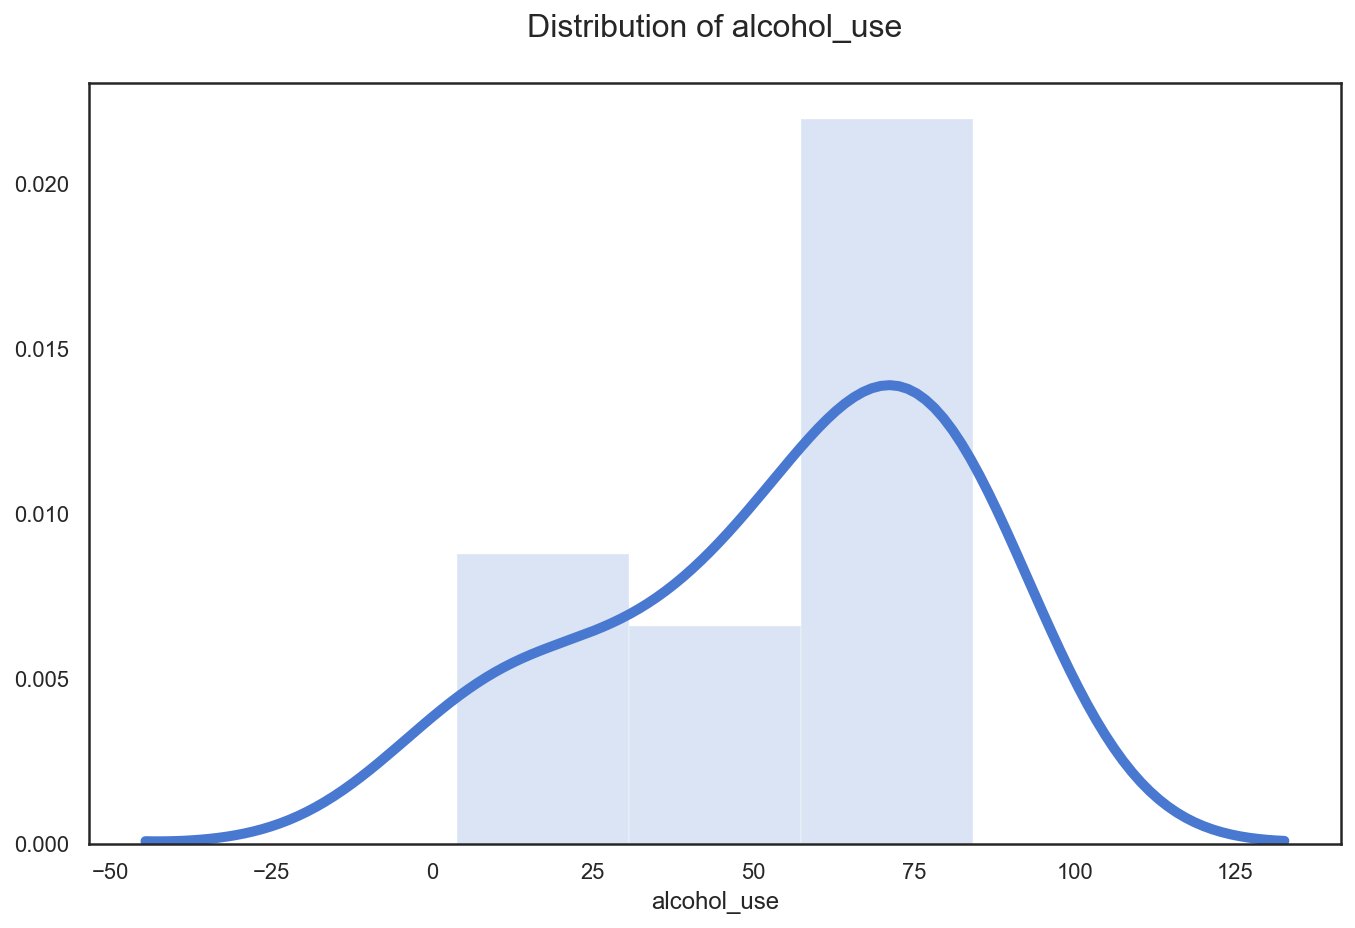

In [16]:
distribution_plotter('alcohol_use',Data)

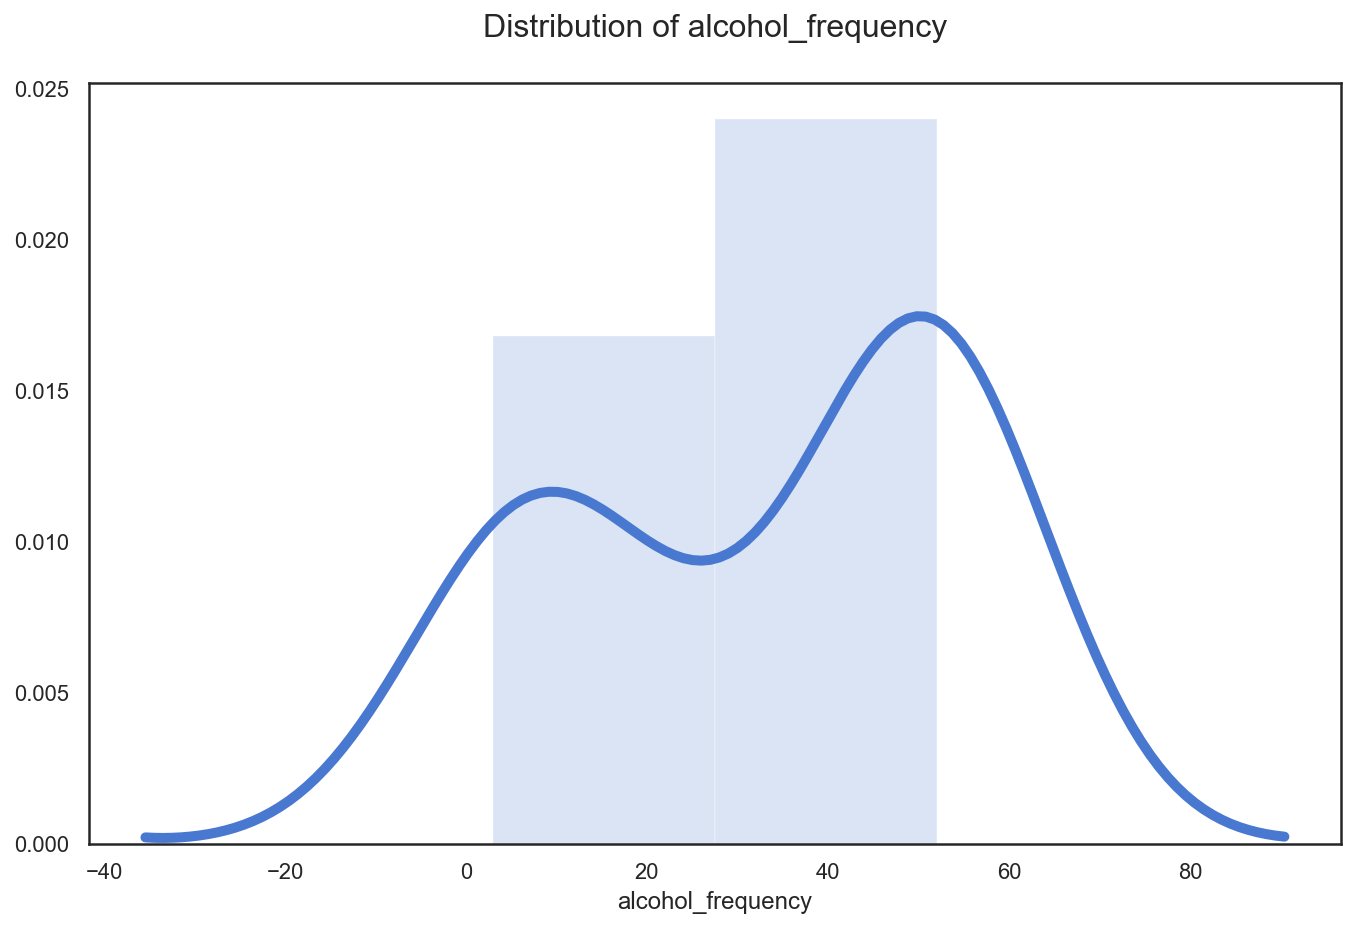

In [17]:
distribution_plotter('alcohol_frequency',Data)

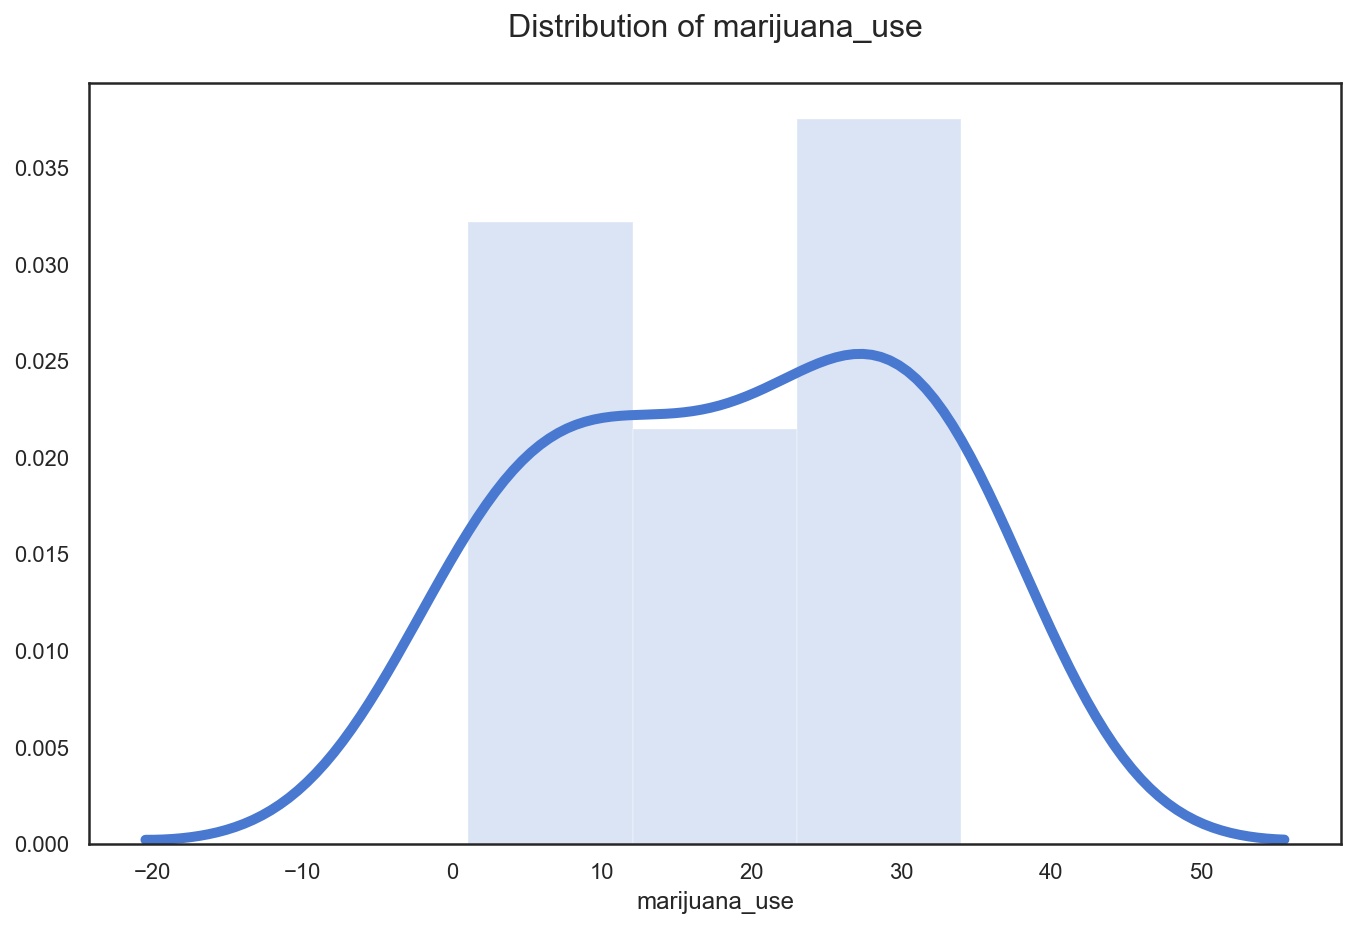

In [18]:
distribution_plotter('marijuana_use',Data)

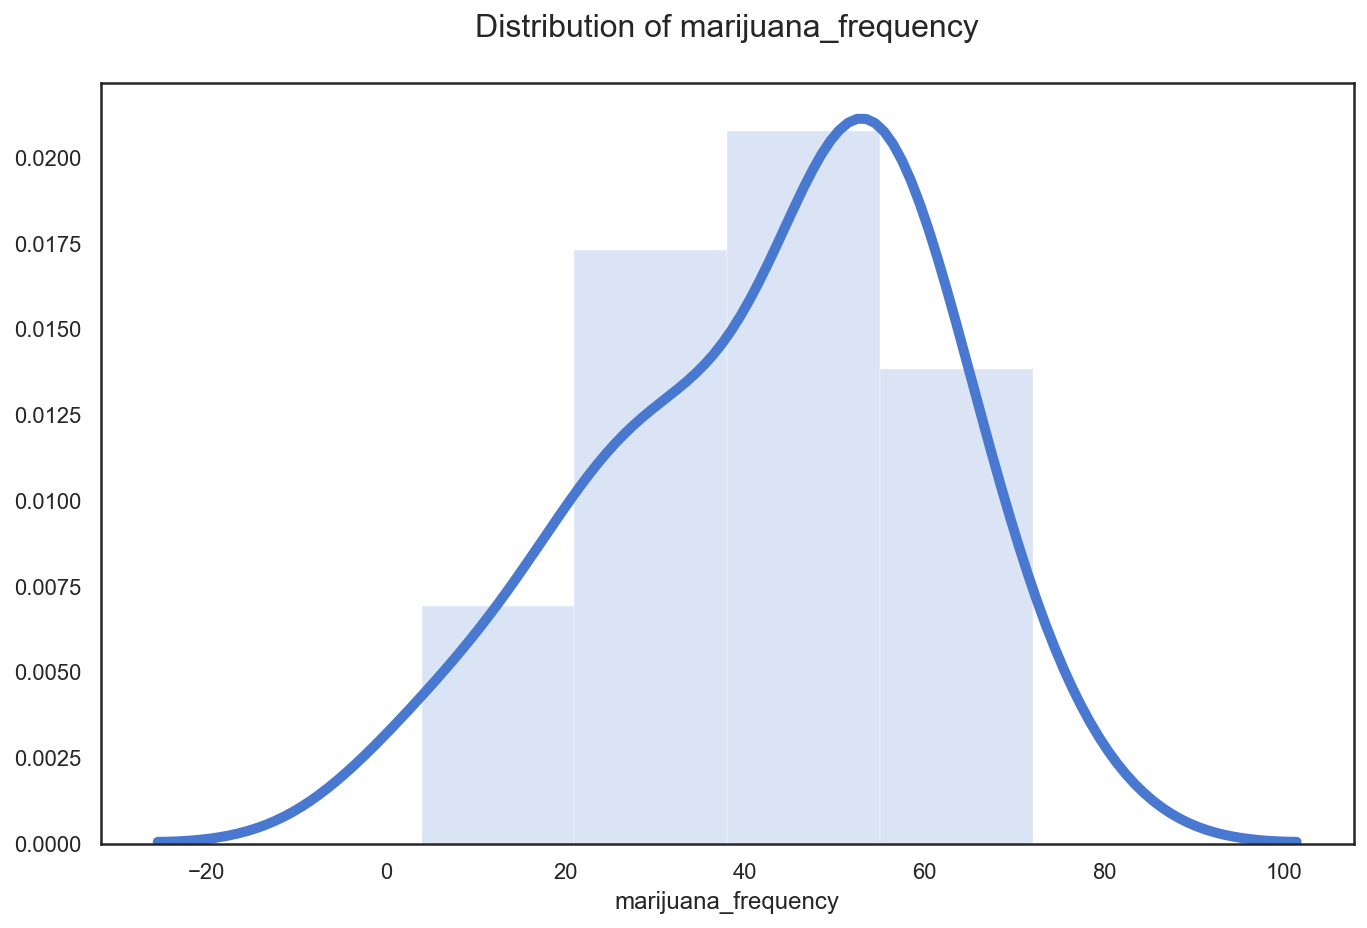

In [19]:
distribution_plotter('marijuana_frequency',Data)

In [20]:
def scaled_diff(v):
    return (np.mean(v) - np.median(v))/np.ptp(v)

In [21]:
scaled_diff(Data)

alcohol_use            0.233808
alcohol_frequency     -0.031854
marijuana_use         -0.205493
marijuana_frequency    0.083528
dtype: float64

In [22]:
print(np.mean(Data))
print(np.std(Data))

alcohol_use            55.429412
alcohol_frequency      33.352941
marijuana_use          18.923529
marijuana_frequency    42.941176
dtype: float64
alcohol_use            26.076331
alcohol_frequency      20.682306
marijuana_use          11.602663
marijuana_frequency    17.814306
dtype: float64


In [ ]:
symmetric = sorted([[k, np.abs(scaled_diff(v))] for k,v in list(d.items())],
                   key=lambda x: x[1])
print('Symmetric:', symmetric[0])

left = sorted([[k, scaled_diff(v)] for k,v in list(d.items())],
              key=lambda x: x[1])
print('Left:', left[0])

right = sorted([[k, scaled_diff(v)] for k,v in list(d.items())],
               key=lambda x: x[1], reverse=True)
print('Right:', right[0])

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.